### 本作业参与评优
### 文件名：1850200-黄天洋-期末大作业-申优.ipynb
### 说明：本文件包含三个自由设计案例以及有限元在椭圆、抛物方程上的应用

## **案例1-小行星运行轨道计算**
#### **一、案例名称：**
小行星运行轨道计算
#### **二、案例内容：**
现在在不同的5个时刻对一颗小行星进行了5次测量，测量得到的5个运行轨迹上的坐标如下表所示：

$i$|1|2|3|4|5
:-:|:-:|:-:|:-:|:-:|:-:
$x_i$|1.02|0.87|0.67|0.44|0.16
$y_i$|0.39|0.27|0.18|0.13|0.13

其中单位为天文测量单位。试确定小行星的轨道方程。
#### **三、案例涉及知识点：**
第2章：线性方程组的直接解法-高斯消去法
#### **四、案例分析和建模方向：**
在本问题中，我们已知小行星运动轨迹上的5个坐标。因此做法是根据开普勒第一定律中小行星运动轨道是椭圆方程的结论来结合坐标数据解出椭圆方程中的参数，从而得出轨道方程。而其中求解线性方程组的过程则可以借助高斯消元法。
#### **五、模型假设与变量符号说明：**
模型假设：假设行星轨道满足开普勒第一定理，不考虑其他的误差因素<br/>
变量说明：$(x_i.y_I)$——小行星的坐标（单位为天文测量单位）
$L$——轨道方程
#### **六、模型建立与求解：**
设小行星轨道方程为：
$$L:a_1x^2+2a_2xy+a_3y^2+2a_4x+2a_5y+1=0$$
而求解$a_i\ (i=1,2,\dots,5)$等价于求解如下的线性方程组：
$$\begin{cases}
x_1^2a_1+2x_1y_1a_2+y_1^2a_3+2x_1a_4+2y_1a_5=-1\\
x_2^2a_1+2x_2y_2a_2+y_2^2a_3+2x_2a_4+2y_2a_5=-1\\
x_3^2a_1+2x_3y_3a_2+y_3^2a_3+2x_3a_4+2y_3a_5=-1\\
x_4^2a_1+2x_4y_4a_2+y_4^2a_3+2x_4a_4+2y_4a_5=-1\\
x_5^2a_1+2x_5y_5a_2+y_5^2a_3+2x_5a_4+2y_5a_5=-1\\
\end{cases}$$
下面使用高斯消元法求解轨道方程$L$：

轨道方程的系数为： [ 2.46453013 -0.44226129  6.49173486 -0.68186507 -3.60079768]


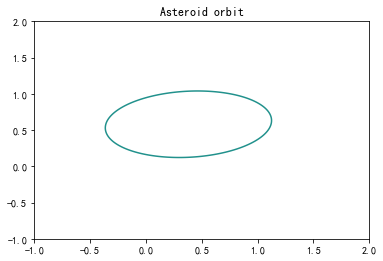

In [90]:
import numpy as np
import matplotlib.pyplot as plt

#小行星坐标数据
x=[1.02,0.87,0.67,0.44,0.16]; 
y=[0.39,0.27,0.18,0.13,0.13]; 

#高斯消元法
def gauss(a,b):
    n=b.size
    for k in range(n-1):
        for i in range(k+1,n):
            m=a[i,k]/a[k,k]
            for j in range(k,n):
                a[i,j]=a[i,j]-m*a[k,j]
            b[i]=b[i]-m*b[k]
    c=b
    x=np.ones(n)
    for l in range(n-1,-1,-1):
        for m in range(l+1,n):
            c[l]=c[l]-a[l,m]*x[m]
        x[l]=b[l]/a[l,l]
    return x

#构造系数矩阵及右端向量
A=np.zeros((len(x),len(x)))
for i in range(len(x)):
    A[i,:]=[x[i]**2,2*x[i]*y[i],y[i]**2,2*x[i],2*y[i]]; 
b=np.ones(len(x))*(-1)

#求解并作出轨道图
a=gauss(A,b)
print('轨道方程的系数为：',a)
def f(x,y,a):return a[0]*x**2+a[1]*2*x*y+a[2]*y**2+a[3]*2*x+a[4]*2*y+1
x=np.linspace(-1,2,500)
y=np.linspace(-1,2,500)
X,Y=np.meshgrid(x,y)
plt.contour(X,Y,f(X,Y,a),0)
plt.title('Asteroid orbit')
plt.show()

#### **七、结果分析与模型检验：**
结果分析：小行星的轨道方程大约为$2.465x^2-0.884xy+6.492y^2-1.364x-7.202y+1=0$
模型检验：使用Matlab对方程组进行验算，结果基本与高斯消去法的结果类似
#### **八、评价与改进方向：**
对于简单的椭圆方程，可以使用本案例中的高斯消去法；而对于考虑了多维的复杂方程，则可以使用迭代方法来求解
#### **九、案例的创新点及说明是否自创：**
案例非自创；本案例不同于原出处，使用了对小型线性方程组效果最好的高斯消元法来进行求解
#### **十、案例的出处及修改：**
《科学计算与MATLAB语言》——中南大学；修改了案例的解决方法

## **案例二-基于SEIR模型的美国初期新冠疫情分析**
#### **一、案例名称：**
基于SEIR模型的美国初期新冠疫情分析
#### **二、案例内容：**
试通过SEIR模型推测美国初期新冠疫情的走势
#### **三、案例涉及知识点：**
第9章：常微分方程边值问题数值解-欧拉公式及其改进
#### **四、案例分析和建模方向：**
SEIR模型是一种考虑了易感者、暴露者、患病者、康复者的比较完善的流行病模型，该模型相比SI、SIR模型更适合用来评估新冠疫情COVID-19；下面结合约翰霍普金斯大学的公开数据试图使用SEIR模型来估计美国初期的新冠走势
#### **五、模型假设与变量符号说明：**
模型假设：不考虑隔离的情况（此时患病者无法传染给易感者，因为是初期美国，故这样是合理的）<br/>
变量说明：<br/>
易感者：$S$，暴露者：$E$，患病者：$I$，康复者：$R$<br/>
总人数：$N$<br/>
$t$时期各人群比例：$s(t),e(t),i(t),r(t)$；数量：$S(t),E(t),I(t),R(t)$<br/>
$t=0$时的初始比率：$s_0,e_0,i_0,r_0$<br/>
日暴露数（每天$I$有效接触的$S$人数）：$\lambda$<br/>
日发病率（每天$E$转化至$I$占$E$的比率）：$\delta$<br/>
日治愈率（每天治愈的$I$占$I$的比率）：$\mu$<br/>
平均治愈天数（$I$转化至$R$的天数）：$\frac{1}{\mu}$<br/>
传染期接触数（每个$I$在传染期$\frac{1}{\mu}$内接触的$S$人数）：$\sigma=\frac{\lambda}{\mu}$
#### **六、模型建立与求解：**
SEIR模型如下：
$$\begin{cases}
N\cdot\dfrac{ds(t)}{dt}=-\lambda s(t)\cdot Ni(t)\\
N\cdot\dfrac{de(t)}{dt}=\lambda s(t)\cdot Ni(t)-\delta\cdot Ne(t)\\
N\cdot\dfrac{di(t)}{dt}=\delta\cdot Ne(t)-\mu\cdot Ni(t)\\
N\cdot\dfrac{dr(t)}{dt}=\mu\cdot Ni(t)\\
\end{cases}$$
化简后：
$$\begin{cases}
\dfrac{ds(t)}{dt}=-\lambda s(t)i(t)\\
\dfrac{de(t)}{dt}=\lambda s(t)i(t)-\delta e(t)\\
\dfrac{di(t)}{dt}=\delta e(t)-\mu i(t)\\
\dfrac{dr(t)}{dt}=\mu i(t)\\
\end{cases}$$
初值条件为：
$$\begin{cases}
s(0)=s_0\\
e(0)=e_0\\
i(0)=i_0\\
r(0)=0\\
s(t)+i(t)+e(t)+r(t)=1\\
\end{cases}$$
下面使用改进欧拉法程序对美国初期的SEIR模型进行求解：

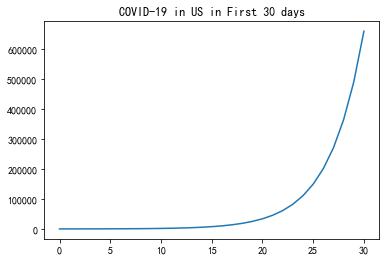

In [91]:
import numpy as np
import matplotlib.pyplot as plt

#改进欧拉法
def odevec_euler(f1,f2,f3,f4,a,b,y0,n):
    h=(b-a)/n
    y1_it=np.zeros(n+1)
    y2_it=np.zeros(n+1)
    y3_it=np.zeros(n+1)
    y4_it=np.zeros(n+1)
    y1_it[0]=y0[0]
    y2_it[0]=y0[1]
    y3_it[0]=y0[2]
    y4_it[0]=y0[3]
    x=a
    for i in range(n):
        y1_it[i+1]=y1_it[i]+h*f1(x,y1_it[i],y2_it[i],y3_it[i],y4_it[i])
        y2_it[i+1]=y2_it[i]+h*f2(x,y1_it[i],y2_it[i],y3_it[i],y4_it[i])
        y3_it[i+1]=y3_it[i]+h*f3(x,y1_it[i],y2_it[i],y3_it[i],y4_it[i])
        y4_it[i+1]=y4_it[i]+h*f4(x,y1_it[i],y2_it[i],y3_it[i],y4_it[i])
        x+=h
    return y1_it,y2_it,y3_it,y4_it

#参数设置
N=3.3*10**8#总人口
lam=2
delta=1/7#发作周期
mu=0.043
s0=2.2*10**8/N
e0=200/N
i0=100/N
r0=4/N
y0=np.array([s0,e0,i0,r0])
def f1(t,s,e,i,r):return -lam*s*i
def f2(t,s,e,i,r):return lam*s*i-delta*e
def f3(t,s,e,i,r):return delta*e-mu*i
def f4(t,s,e,i,r):return mu*i

n=30
y1_it,y2_it,y3_it,y4_it=odevec_euler(f1,f2,f3,f4,0,n,y0,n)
x=np.linspace(0,n,n+1)
plt.plot(x,N*y3_it)
plt.title('COVID-19 in US in First 30 days')
plt.show()

#### **七、结果分析与模型检验：**
结果分析：结果表明在首月中美国新冠疫情的增长大致呈指数增长，在首月后患病者$I$的数量大约达到60万人<br/>
模型检验：根据约翰霍普金斯大学的公开数据，美国新冠的感染者在首月后确实大致在60万人上下，而指数型的增长趋势也基本符合现实
#### **八、评价与改进方向：**
本案例是SEIR模型最简单的应用，实际上还应该考虑隔离者的情况，并且使用跟随$t$变化的动态参数设置，这样能得到更好的结果
#### **九、案例的创新点及说明是否自创：**
案例半自创；本案例中模型的部分想法以及参数设置参考了一篇研究北京、广东、湖南新冠疫情的文章
#### **十、案例的出处及修改：**
算法参数设置参考了CSDN论坛 https://blog.csdn.net/BiuFEIMIR/article/details/108069090<br/>
JHU公开数据 https://coronavirus.jhu.edu/map.html

## **案例三-PageRank算法评估2019年中超各球队实力**
#### **一、案例名称：**
PageRank算法评估2019年中超各球队实力
#### **二、案例内容：**
已知2019年中超联赛所有球队的所有比赛数据（数据来源：懂球帝），现希望使用一种除联赛积分以外的方式来对中超各个球队的实力进行排序，因此尝试使用Google网页排序算法PageRank算法
#### **三、案例涉及知识点：**
第8章：矩阵特征值与特征向量的计算-幂方法
#### **四、案例分析和建模方向：**
Google创始人提出的PageRank算法是一种针对网页排名的算法。该算法有两个主要思想：一是受多个网页指向的网页排名更高；二是被高排名网页指向的网页排名会更高。<br/>
**不难发现，这种算法似乎也可以适用于球队之间的实力排名，显然一个战胜了多个其他球队的球队有更强的实力，并且如果一支球队战胜了实力强大的球队，那么在考虑其实力时理应获得更高的评价；而使用联赛积分来评判则不能体现这一点，因为无论是赢了广州恒大还是深圳佳兆业，获得的积分都是3分**<br/>
下面我们类比网页的PageRank算法来建模，其中网页的超链接结构使用球队的胜负关系来类比：<br/>
球队$X_i$的PageRank值可以写为：
$$PR(X_i)=\alpha\sum_{X_j\in S(X),j\neq i}\frac{PR(X_j)}{n_j}+\frac{1-\alpha}{N}$$
其中$S(X)$表示所有被$X_i$战胜的集合，$\alpha$表示阻尼系数，$n_j$表示$X_j$的比赛数量。若写为矩阵语言，即为：
$$P_{n+1}=\alpha SP_n+\frac{1-\alpha}{N}e^T$$
若记$A=\alpha S+\frac{1-\alpha}{N}ee^T$，则上式表示为$P_{n+1}=AP_n$。可以证明这个概率分布是收敛的，即$P=AP$，且$1$是$A$是唯一主特征值。<br/>
于是我们的建模方向就是根据球队的胜负关系（主客场比赛都纳入考虑）写出矩阵$A$，然后使用改进幂方法来求出$1$对应的特征向量。
#### **五、模型假设与变量符号说明：**
模型假设：假设不考虑因为联赛赛程时间跨度长而出现的疲劳、伤病等影响球队实力的额外因素。<br/>
#### **六、模型建立与求解：**
提取懂球帝上2019年中超联赛所有比赛的胜负关系数据，并保存为txt格式。<br/>
例如，记广州恒大为A，北京国安为B，则广州恒大战胜北京国安的比赛就保存为A B<br/>
下面记阻尼系数$\alpha=0.85$，下面的程序根据胜负关系的数据算出$S,A$，使用改进幂方法求解最大模特征向量，并最后给出球队实力的排名：

各球队PageRank值（按联赛排名顺序）： [0.13416060436517424, 0.11232652155210246, 0.112317213492141, 0.08792087940595969, 0.07978154438711357, 0.06645978895405266, 0.05769853510752513, 0.05949755009005341, 0.04143536916199148, 0.05218827614603498, 0.043446142924184986, 0.030757823851885798, 0.03800630188282796, 0.023750792837880435, 0.017042954120709577, 0.04320970172036263]


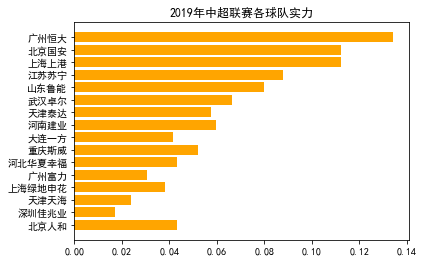

In [98]:
import numpy as np
import matplotlib.pyplot as plt

#改进幂方法
def improved_power(A,eps=10**-5):
    n=A.shape[0]
    v=np.ones(n)
    lam=np.max(v)
    u=v/lam
    err=1
    it=0
    while err>eps:
        v=np.dot(A,u.reshape(len(u),-1))
        lam0=lam
        lam=v[np.where(np.abs(v)==np.max(np.abs(v)))[0]]
        u=v/lam[0]
        err=np.abs(lam-lam0)
        if len(err)>=1:
            err=err[0]
        it+=1
    return lam,u,it

#根据球队胜负计算矩阵A
def Pagerank_struct(file):
    data=open(file,'r')
    matches=[line.strip('\n').split(' ') for line in data]
    l=len(matches)
    for i in range(l):#原始数据中胜者在前，此处将胜者置于后
        temp=matches[i][0]
        matches[i][0]=matches[i][1]
        matches[i][1]=temp
    teams=[]
    for match in matches:#提取所有队伍编号
        if match[0] not in teams:teams.append(match[0])
        if match[1] not in teams:teams.append(match[1])
    teams=sorted(teams)
    N=len(teams);i=0;num={};
    for team in teams:#将队伍编号改为数字
        num[team]=i;i+=1;
    for match in matches:
        match[0]=num[match[0]]
        match[1]=num[match[1]]
    S=np.zeros((N, N))#计算S矩阵
    for match in matches:
        S[match[1],match[0]]+=1
    for j in range(N):
        sum_col=sum(S[:,j])
        for i in range(N):
            S[i,j]/=sum_col
    alpha=0.85
    A=alpha*S+(1-alpha)/N*np.ones((N, N))#计算A矩阵
    return A

#主程序-计算中超各球队的PageRank值
A=Pagerank_struct('CSL2019.txt')#CSL2019.txt的具体内容见附件
lam,u,it=improved_power(A)
pagerank=u/sum(u)
pagerank=[i for item in pagerank for i in item]
print('各球队PageRank值（按联赛排名顺序）：',pagerank)
teams=['广州恒大','北京国安','上海上港','江苏苏宁','山东鲁能','武汉卓尔','天津泰达','河南建业','大连一方','重庆斯威','河北华夏幸福','广州富力','上海绿地申花','天津天海','深圳佳兆业','北京人和']

#绘图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.barh(list(reversed(teams)),list(reversed(pagerank)),color='orange')
plt.title('2019年中超联赛各球队实力')
plt.show()

#### **七、结果分析与模型检验：**
结果分析：中超各球队的PageRank值如上，根据该理论，2019年中超球队实力从强到弱为：广州恒大、北京国安、上海上港、江苏苏宁、山东鲁能、武汉卓尔、河南建业、天津泰达、重庆斯威、河北华夏幸福、北京人和、大连一方、上海绿地申花、广州富力、天津天海、深圳佳兆业<br/>
模型检验：通过结论可以看到，基于PageRank算法的球队实力排序与2019年实际各个球队联赛积分排名很类似，因此可以说明该算法的有效性；但是两者在一些细节上有所不同，上游梯队两者完全一样，下游梯队两者有些差距，例如联赛垫底的北京人和获得了比较高的实力评价，这是因为北京人和在第5轮联赛战胜了广州恒大，而恒大在30轮比赛中仅输了4场，故北京人和获得了较高的权重，并且在那场比赛中恒大王牌保利尼奥仅15分钟就被红牌罚下，因此在这点上算法不够合理；而其他的区别例如重庆斯威强于大连一方、上海申花强于广州富力都是我根据看球经验认为非常合理的，因此这里体现出了评价实力时该算法优于联赛积分的地方
#### **八、评价与改进方向：**
本案例使用了球队之间的胜负关系来模仿网页的超链接结构，因此没有考虑球队之间平局的问题；<br/>
因为我认为可以加上平局的数据，对平局和胜场各赋一个权重（前者低后者高），再对S、A矩阵进行计算，但因为时间关系我没有实现这个步骤
#### **九、案例的创新点及说明是否自创：**
案例自创；<br/>
创新点：尝试了网页排序算法在足球球队实力评估中的应用，与传统的联赛积分排序方法相比考虑到了战胜强队应当获得更高的评价的因素；相比传统迭代法使用了改进幂方法求模最大特征向量的数值方法来求解PageRank值
#### **十、案例的出处及修改：**
数据提取自懂球帝

## **有限元程序**
### 说明：本程序使用三角形网格划分方法，并使用线性插值，适用于椭圆方程、抛物方程在二维矩形区域下边值问题的求解并绘制FEM数值解、真解、误差图，具体使用方法可参考后文的几个例子，程序中各个函数的作用则可以参考程序中的注释；

In [100]:
#####程序正文#####
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

######迭代生成器#####
#获取集合中成对元素的生成器，方便后续计算而写的小工具
#输入：某个集合
#输出：该集合中所有的二元组（以迭代器形式）
def pair_generator(L,end=False):
    Lset=tuple(L)#集合元组
    n=len(Lset)
    if end is False:
        indices=list((range(n-1)))#坐标集
        for i in indices:
            yield(Lset[i],Lset[i+1])#yield迭代生成器
    if end is True:
        indices=list(range(n))
        for i in indices:
            if i<n-1:yield(Lset[i],Lset[i+1])
            else:yield(Lset[i],Lset[0])

#####网格划分及编号#####
#三角形节点坐标划分及编号，编号顺序为从下到上、从左到右
#输入：x轴、y轴范围x_lim、y_lim及划分数size（nx*ny）
#输出：划分后所有节点的坐标nodes、按编号顺序的各个编号三角形的坐标序列serial
def create_tri(x_lim,y_lim,size):
    nx=int(size[0])
    ny=int(size[1])
    X=np.linspace(x_lim[0],x_lim[1],nx+1)
    Y=np.linspace(y_lim[0],y_lim[1],ny+1)
    nodes=np.array([(i,j)for j in Y for i in X])#节点(x,y)生成-先行后列
    serial=np.array([((nx+1)*i[1]+j[0]+1,
                      (nx+1)*i[0]+j[0]+1,
                      (nx+1)*i[1]+j[1]+1,
                      (nx+1)*i[0]+j[1]+1,
                      (nx+1)*i[1]+j[1]+1,
                      (nx+1)*i[0]+j[0]+1)
               for i in pair_generator(range(ny+1))
               for j in pair_generator(range(nx+1))],dtype=int)#结点号(i,j,k)生成-对应上方节点
    return nodes,serial.reshape(nx*ny*2,3)

#####单元形函数计算#####
#计算某一单元的基函数，并为后续计算刚度矩阵和荷载向量提供组件
#输入：右端函数f、节点nodes、该单元的编号序列serial_0
#输出：该单元的节点坐标node、微分算子矩阵B、U（U只有抛物方程才会用到）、单元面积area
def Ns_K(f,nodes,serial_0):
    node=[]
    for i in range(3):node.append(nodes[serial_0[i]-1])#给出该单元节点(xs,ys)
    area=1/2*np.linalg.det([[node[0][0],node[0][1],1],[node[1][0],node[1][1],1],[node[2][0],node[2][1],1]])#计算该单元面积area
    B=[];F=[];U=[];
    for i in pair_generator(np.array([1,2,0]),end=True):
        a=np.linalg.det([[node[i[0]][1],1],[node[i[1]][1],1]])#参数值(as,bs)
        b=-np.linalg.det([[node[i[0]][0],1],[node[i[1]][0],1]])
        c=np.linalg.det([[node[i[0]][0],node[i[0]][1]],[node[i[1]][0],node[i[1]][1]]])
        B.append(a);B.append(b);
        N=lambda y,x:(a*x+b*y+c)/(2*area)#单元形函数，即基函数N
        Nf=lambda y,x:N(y,x)*f(x,y)
        F.append(integrate.dblquad(Nf,min(node[0][0],node[2][0]),
                                max(node[0][0],node[2][0]),
                                lambda x:((node[1][1]-node[2][1])/(node[1][0]-node[2][0])*(x-node[1][0])+node[1][1]),
                                lambda x:node[0][1])[0])#荷载向量F组件（注：此处将下三角和下三角统一计算，因此后续拼接时添加了符号后的F才是真正的荷载向量）
        U.append(integrate.dblquad(N,min(node[0][0],node[2][0]),
                                max(node[0][0],node[2][0]),
                                lambda x:((node[1][1]-node[2][1])/(node[1][0]-node[2][0])*(x-node[1][0])+node[1][1]),
                                lambda x:node[0][1])[0])#微分算子U
    B=np.array(B).reshape(3,2).T/2/area#微分算子矩阵B
    return node,B,np.array(F),np.array(U),area

#####总刚度矩阵及荷载向量计算#####
#利用先前的组件组装总刚度矩阵和总荷载向量
#输入：右端函数f、节点nodes、编号序列serial、方程类型ftype
#输出：总刚度矩阵K_total、总荷载向量F_total（未添加边界条件）
def total_KF(f,nodes,serial,ftype):
    num=len(nodes)
    K_total=np.zeros((num,num))#初始化
    F_total=np.zeros(num)
    for i in range(len(serial)):#在所有的编号序列中循环，对每个单位元计算刚度矩阵及荷载向量
        S=serial[i]
        node,B,F,U,area=Ns_K(f,nodes,S)
        F=F*(-1)**i#考虑上下三角积分区域的区别，添加符号
        if ftype=='ellipse':#椭圆方程的情况
            K=np.dot(B.T,B)*area
        elif ftype=='parabola':#抛物方程的情况
            K=np.outer(B[0,:],B[0,:])*area+np.outer(U*(-1)**i,B[1,:])
        for m in range(3):#将刚度矩阵、荷载向量按编号组装
            F_total[S[m]-1]+=F[m]
            for n in range(3):
                K_total[S[m]-1,S[n]-1]+=K[m,n]
    return K_total,F_total

#####添加边界条件并求解#####
#为荷载向量添加边界条件（第一类边界条件）
#输入：右端函数f、总刚度矩阵K、总荷载向量F（未添加边界条件）、x轴y轴范围x_lim、y_lim、划分数size、边界条件bound、方程类型ftype
#输出：方程的数值解u
def cal_bound(f,K,F,x_lim,y_lim,size,bound,ftype):
    m=int(size[0])+1;n=int(size[1])+1;
    u=np.zeros(m*n);label=np.zeros(m*n);#填入边界条件并标记
    if ftype=='ellipse':
        u[0:m]=bound[0](np.linspace(x_lim[0],x_lim[1],m));label[0:m]=1
        u[(m*n-m):m*n]=bound[1](np.linspace(x_lim[0],x_lim[1],m));label[(m*n-m):m*n]=1
        u[0:(m*n-m+1):m]=bound[2](np.linspace(y_lim[0],y_lim[1],n));label[0:(m*n-m+1):m]=1
        u[(m-1):m*n:m]=bound[3](np.linspace(y_lim[0],y_lim[1],n));label[(m-1):m*n:m]=1
    elif ftype=='parabola':
        u[0:m]=bound(np.linspace(x_lim[0],x_lim[1],m));label[0:m]=1;label[(m*n-m):m*n]=1;
        u[0:(m*n-m+1):m]=0;label[0:(m*n-m+1):m]=1
        u[(m-1):m*n:m]=0;label[(m-1):m*n:m]=1
    index=np.where(label==1)[0]
    Ke=K.copy()
    Ke[index,:]=0;Ke[:,index]=0;Ke=K-Ke;
    C=-np.dot(Ke,u);C[index]=0;F+=C;#计算添加边界条件后的荷载向量
    K=np.delete(K,index,0);K=np.delete(K,index,1)
    F=np.delete(F,index)#删去边界位置的元素
    sol=np.linalg.solve(K,F)#使用数值方法求解线性方程组
    fumino=np.linspace(0,m*n-1,m*n)
    inner=np.delete(fumino,index).astype(int)
    u[inner]=u[inner]+sol#将内部解和外部解相加，得到最终解
    return u.reshape(n,m)

#####绘图#####
#绘制数值解、真解和误差对比图#
#输入：右端函数f、真解函数sol、数值解u、x轴y轴范围x_lim、y_lim、方程类型ftype
#输出：均方误差MSE、均方根误差RMSE、最大误差、数值解、真解和误差对比图
def sol_plot(f,sol,u,x_lim,y_lim,size):    
    x=np.linspace(x_lim[0],x_lim[1],int(size[0])+1)
    y=np.linspace(y_lim[0],y_lim[1],int(size[1])+1)
    X,Y=np.meshgrid(x,y)#制造网格
    true=sol(X,Y)#计算真解
    error=np.abs(true-u)#计算误差
    MSE=(np.sum(error**2))/np.size(error)
    RMSE=np.sqrt(MSE)
    print('均方误差MSE：',MSE)
    print('均方根误差RMSE：',RMSE)
    print('最大误差：',np.max(error))
    fig=plt.figure(figsize=(40,10))
    ax=fig.add_subplot(131,projection='3d')
    ax.set_title("FEM")
    ax.plot_surface(X,Y,u,cmap='plasma')
    ax=fig.add_subplot(132,projection='3d')
    ax.set_title("TRUE")
    ax.plot_surface(X,Y,true,cmap='rainbow')
    ax=fig.add_subplot(133,projection='3d')
    ax.set_title("ERROR")
    ax.plot_surface(X,Y,error,cmap='Spectral_r')

#####主函数（仅求解）#####
#输入：右端函数f、x轴y轴范围x_lim、y_lim、划分数size、边界条件bound、方程类型ftype
#输出：方程的数值解u
def main(f,x_lim,y_lim,size,bound,ftype):
    nodes,serial=create_tri(x_lim,y_lim,size)
    K,F=total_KF(f,nodes,serial,ftype)
    u=cal_bound(f,K,F,x_lim,y_lim,size,bound,ftype)
    return u
    
#####主函数（求解并绘制数值解、真解、误差图）#####
#输入：右端函数f、x轴y轴范围x_lim、y_lim、划分数size、边界条件bound、方程类型ftype
#输出：方程的数值解u
def FEM(f,x_lim,y_lim,size,bound,ftype):
    u=main(f,x_lim,y_lim,size,bound,ftype)
    sol_plot(f,sol,u,x_lim,y_lim,size)

### **椭圆方程-有限元**
椭圆方程在矩形区域下的第一类边界问题，形如：
$$\begin{cases}
-\Delta{u}&=f(x,y)&(x,y)\in[L_1,L_2]\times[H_1,H_2]\\
u(x,H_1)&=g_1(x)&L_1\le x\le L_2\\
u(x,H_2)&=g_2(x)&L_1\le x\le L_2\\
u(L_1,y)&=h_1(y)&H_1\le y\le H_2\\
u(L_2,y)&=h_2(y)&H_1\le y\le H_2\\
\end{cases}$$

**椭圆方程——例1**<br/>
方程为：
$$f=2\pi^2\sin\pi x\sin\pi y\\
\Omega=[0,1]^2$$
真解为:
$$u=\sin\pi x\sin\pi y$$

均方误差MSE： 2.0199475496336512e-07
均方根误差RMSE： 0.0004494382660203347
最大误差： 0.0009133513146024619


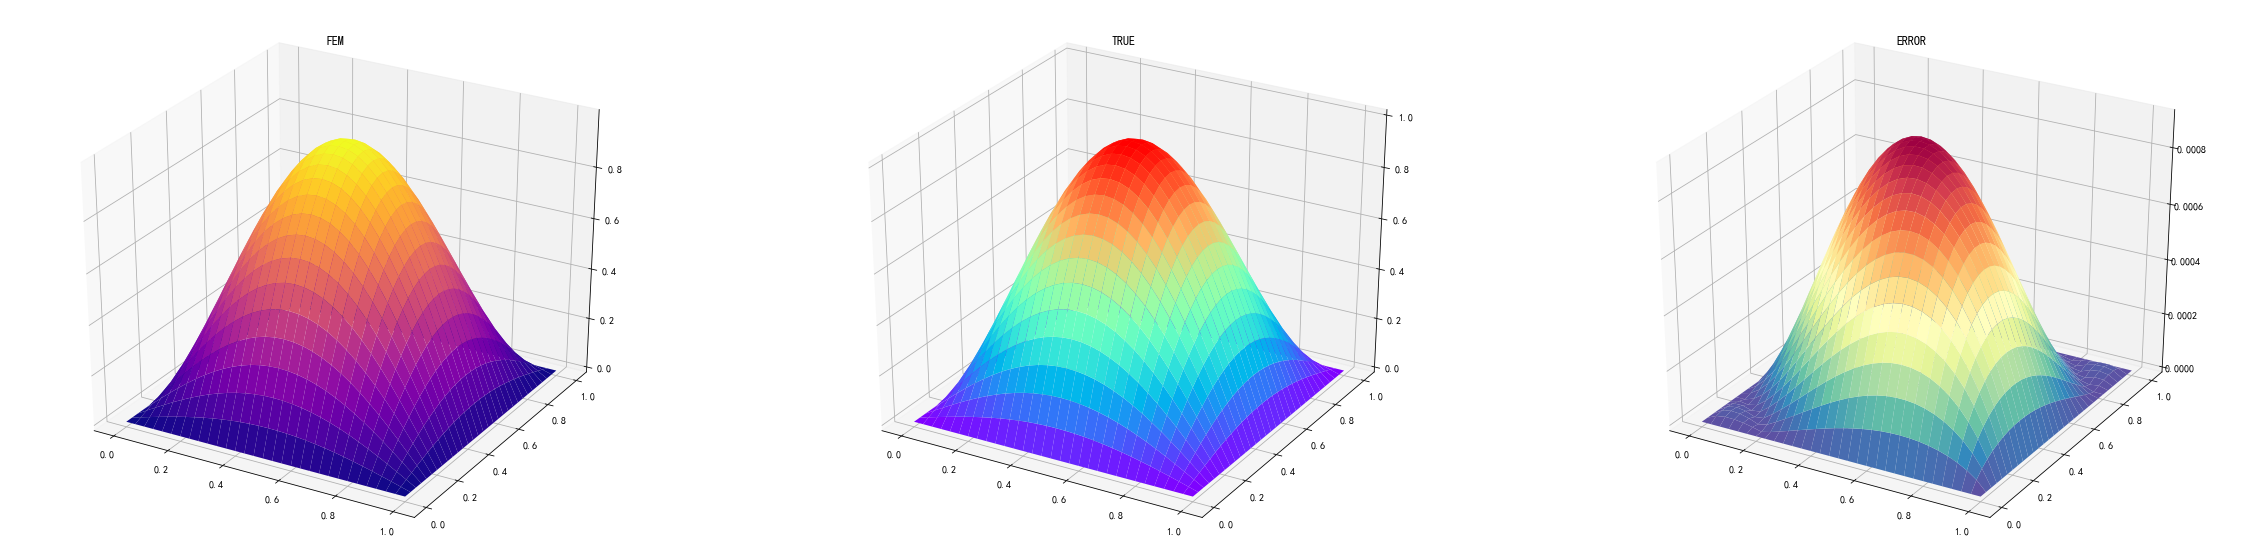

In [94]:
x_lim=[0,1]
y_lim=[0,1]
size=[30,30]
f=lambda x,y:2*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)
sol=lambda x,y:np.sin(np.pi*x)*np.sin(np.pi*y)
g1=lambda x:sol(x,x_lim[0])
g2=lambda x:sol(x,x_lim[1])
h1=lambda y:sol(y_lim[0],y)
h2=lambda y:sol(y_lim[1],y)
bound=[g1,g2,h1,h2]
ftype='ellipse'

FEM(f,x_lim,y_lim,size,bound,ftype)

**椭圆方程——例2**<br/>
方程为：
$$f=-6x+6y\\
\Omega=[0,1]^2$$
真解为:
$$u=x^3-y^3$$

均方误差MSE： 1.185929348296056e-31
均方根误差RMSE： 3.4437324929443287e-16
最大误差： 1.3322676295501878e-15


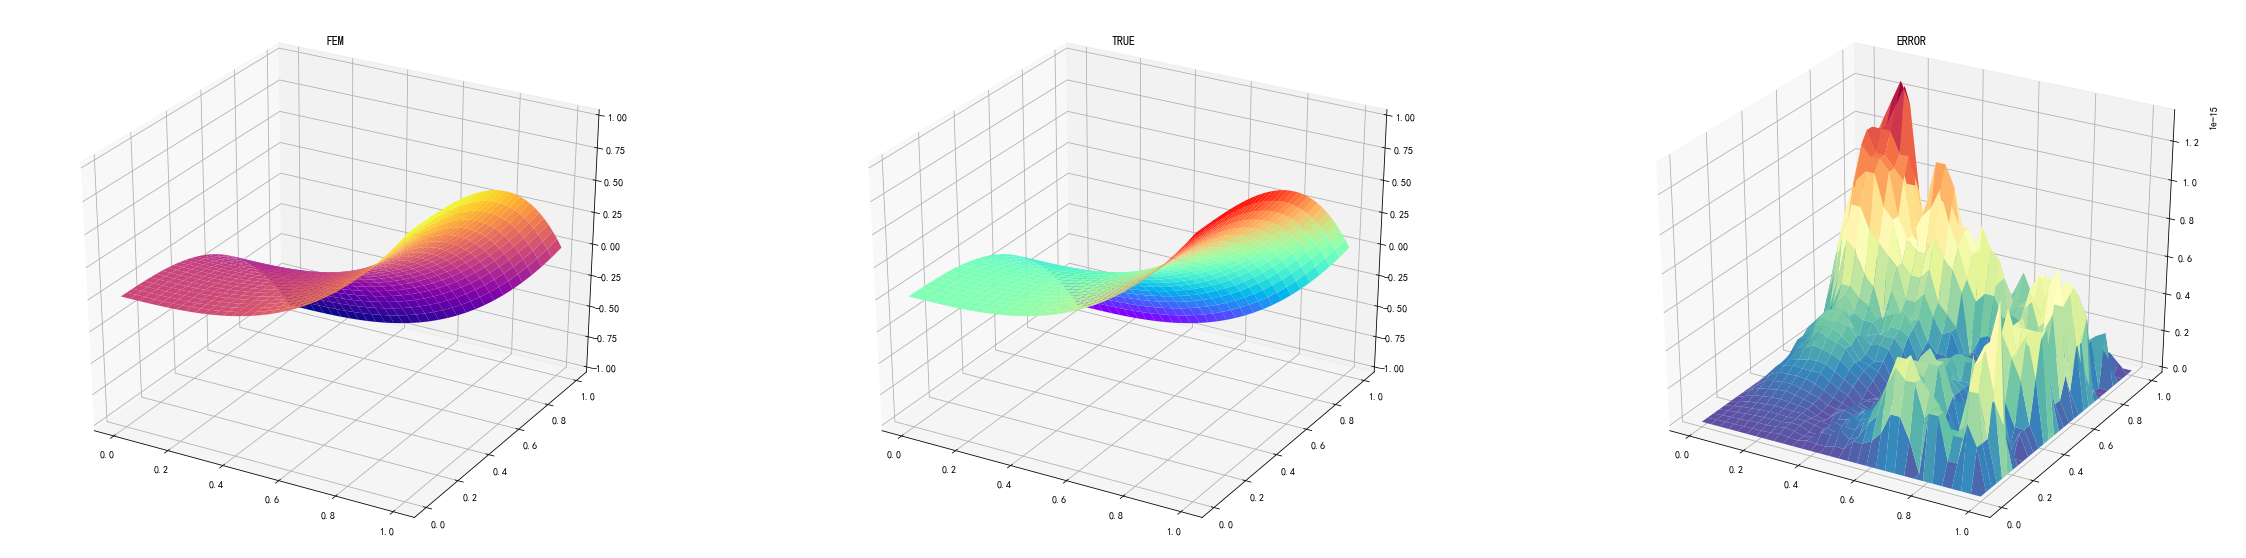

In [95]:
x_lim=[0,1]
y_lim=[0,1]
size=[30,30]
f=lambda x,y:-6*x+6*y
sol=lambda x,y:x**3-y**3
g1=lambda x:sol(x,x_lim[0])
g2=lambda x:sol(x,x_lim[1])
h1=lambda y:sol(y_lim[0],y)
h2=lambda y:sol(y_lim[1],y)
bound=[g1,g2,h1,h2]
ftype='ellipse'

FEM(f,x_lim,y_lim,size,bound,ftype)

### **抛物方程-有限元**
抛物方程在矩形区域下的第一类边界问题，形如：
$$\begin{cases}
\dfrac{\partial u}{\partial t}-\dfrac{\partial^2 u}{\partial x^2}&=f(x,t)&(x,t)\in[L_1,L_2]\times[T_1,T_2]\\
u(x,T_1)&=g(x)&L_1\le x\le L_2\\
u(L_1,t)&=0&T_1\le y\le T_2\\
u(L_2,t)&=0&T_1\le y\le T_2\\
\end{cases}$$

**抛物方程——例1**<br/>
方程为：
$$f=0\\
\Omega=[0,1]\times[0,0.5]$$
真解为：
$$u=e^{-\pi t^2}\sin\pi x$$

均方误差MSE： 3.2506258902468398e-06
均方根误差RMSE： 0.0018029492200965728
最大误差： 0.00719188335582637


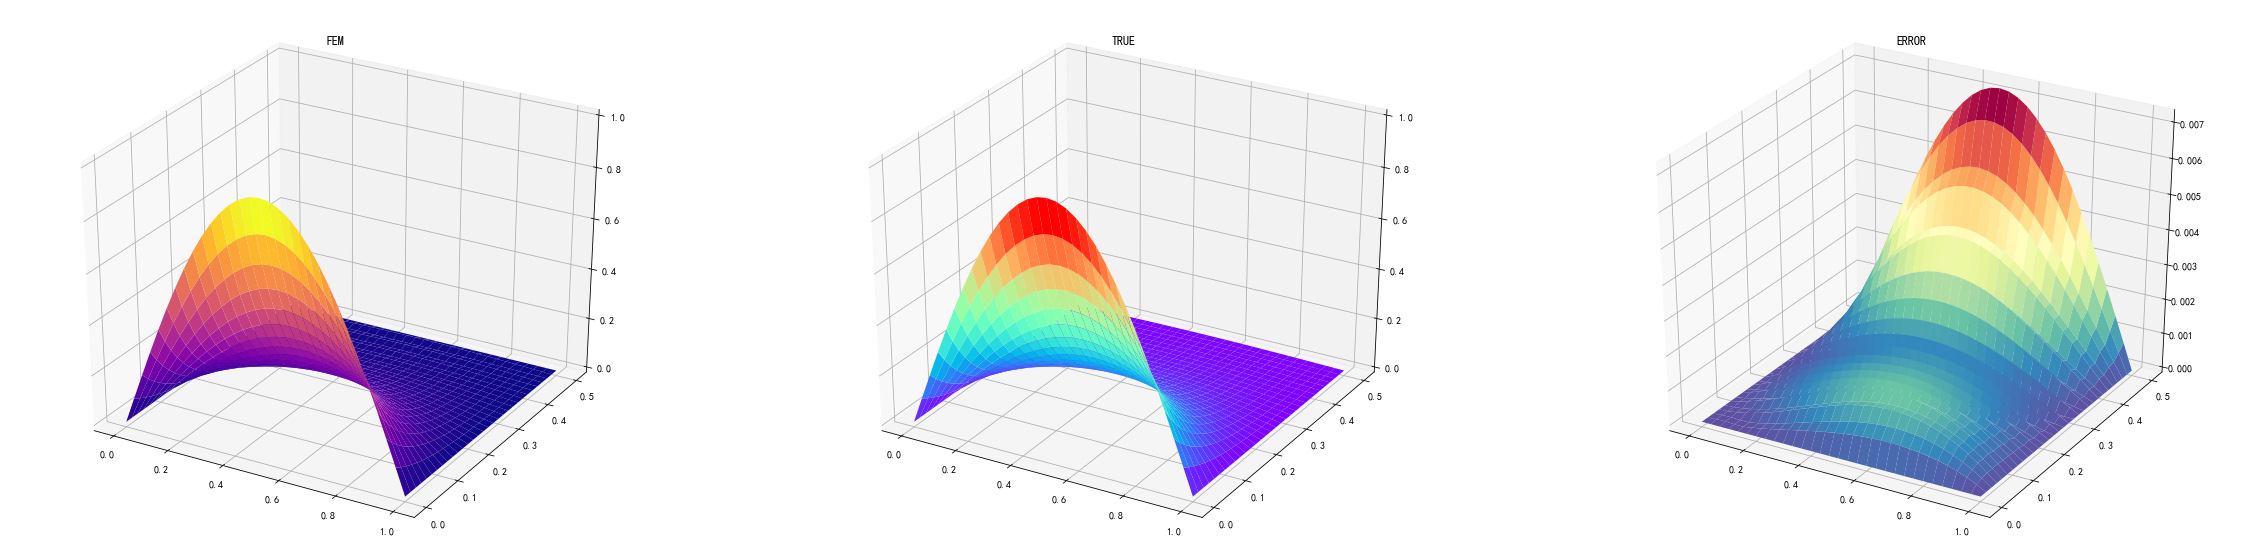

In [96]:
x_lim=[0,1]
y_lim=[0,0.5]
size=[30,30]
f=lambda x,t:0
sol=lambda x,t:np.e**(-np.pi**2*t)*np.sin(np.pi*x)
g=lambda x:sol(x,y_lim[0])
bound=g
ftype='parabola'

FEM(f,x_lim,y_lim,size,bound,ftype)

**抛物方程——例2**<br/>
方程为：
$$f=x(4-x)\cos t+2\sin t\\
\Omega=[0,4]\times[0,4\pi]$$
真解为：
$$u=x(4-x)\sin t$$

均方误差MSE： 0.0009510186050459995
均方根误差RMSE： 0.0308385895437194
最大误差： 0.08220372763297434


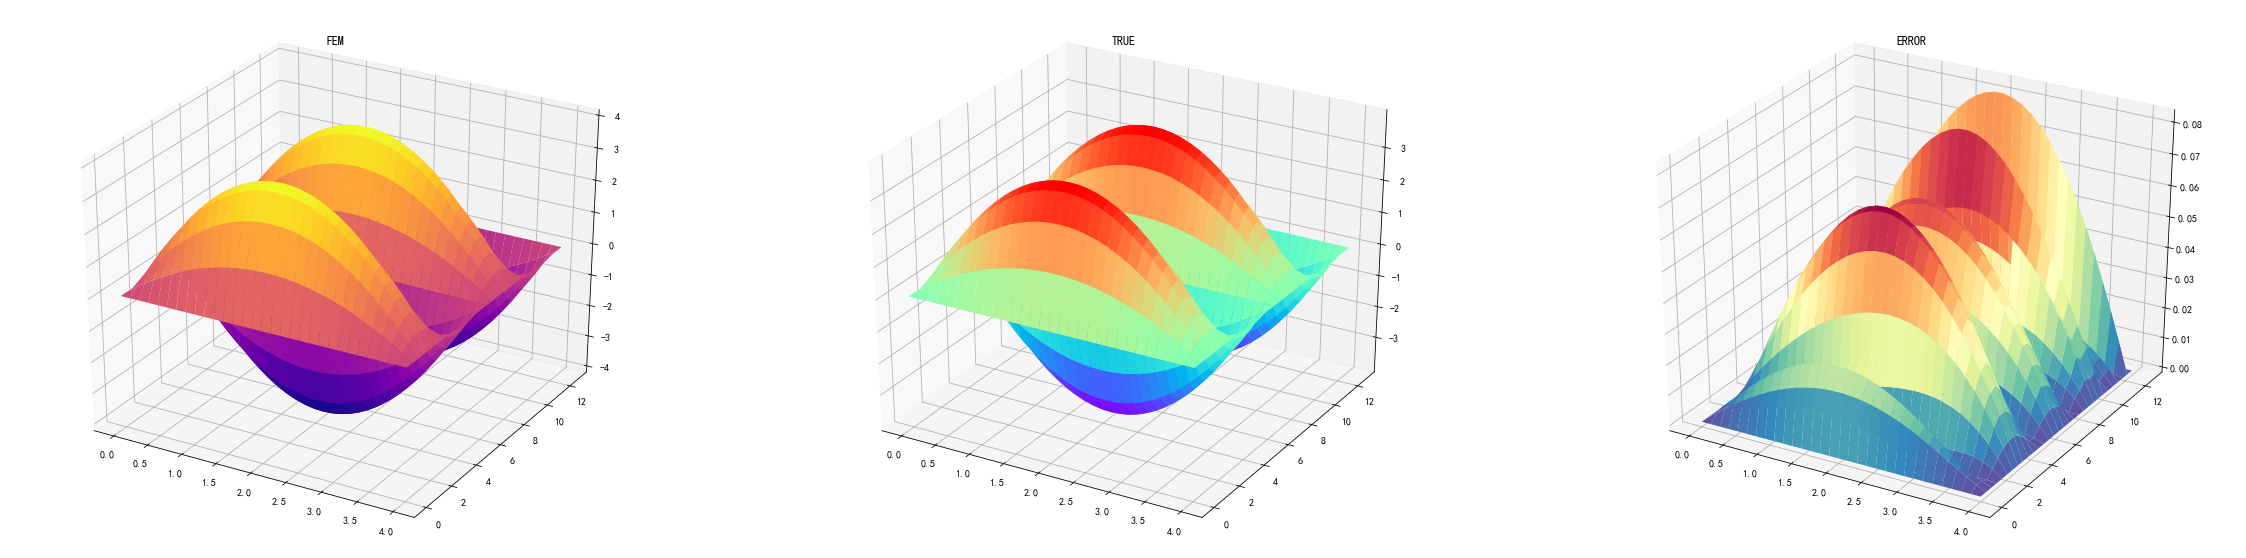

In [97]:
x_lim=[0,4]
y_lim=[0,4*np.pi]
size=[30,30]
f=lambda x,t:x*(4-x)*np.cos(t)+2*np.sin(t)
sol=lambda x,t:x*(4-x)*np.sin(t)
g=lambda x:sol(x,y_lim[0])
bound=g
ftype='parabola'

FEM(f,x_lim,y_lim,size,bound,ftype)

### **附录-CSL2019.txt**
### 说明：markdown中使用了未换行格式，复制到txt中并和ipynb文件保存在同一路径下即可复现案例三的结果
E P
A N
C M
B F
O K
D G
A G
B J
C D
F P
O N
K M
G L
B P
A I
C K
E N
M H
D F
J O
B D
J C
A L
G I
M P
L M
J K
D O
P A
I E
B H
C F
A E
G H
B K
D L
L O
H D
N M
C G
A J
B I
E F
C L
B A
E K
H P
O M
F I
H K
J P
L N
B O
C E
C H
B N
A F
E M
L P
D J
G K
I O
P G
K D
F N
I M
A O
E L
C B
P N
F O
C I
A H
B G
B M
A C
K I
F L
D P
M D
B L
H O
A K
C P
G E
J F
I P
J G
L H
F K
C O
E B
A M
A N
L J
B F
C M
G D
E P
I H
B J
A G
H E
K M
I L
F P
C D
L G
M H
A I
C K
E N
J O
B P
A L
M P
E O
D B
K J
I E
H B
M L
N G
A P
D O
I J
B K
G H
A E
D H
K P
O L
C G
B I
F E
H P
E K
G F
A B
M O
D A
E C
L N
H K
G M
F I
J P
D J
I O
K G
B N
C H
F A
L P
N F
A O
E L
C B
G P
M I
D K
H J
J M
K L
B G
C I
B M
H N
E J
F L
D P
G O
A C
B L
N I
A K
E G
F J
D M
I P
H L
K F
A M
C O
D N
G J
B E